# Biblioteca

In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LassoCV, LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

import xgboost as xgb

import shap
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Pycaret

In [145]:
# import pandas as pd
# from pycaret.classification import setup, compare_models

# # Carregar o seu dataset
# df = pd.read_csv('gallstone.csv')

# # 1. Configurando o ambiente do PyCaret
# # 'target' é a coluna que queremos prever.
# # session_id garante que os resultados sejam os mesmos se rodar de novo.
# s = setup(data=df, target='Gallstone Status', session_id=123)

# # 2. Comparando todos os modelos
# best_model = compare_models()

# # A função acima já vai imprimir a tabela com os resultados
# print("\nO melhor modelo encontrado é:")
# print(best_model)

# Baixando O Dataset

In [146]:
# Carregando o dataset
df = pd.read_csv('gallstone.csv')

# Analise Exploratoria do Dataset

In [147]:
# Exibindo as 5 primeiras linha do dataset
df.head()

,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
0,0,50,0,0,0,0,0,0,185,92.8,...,40.0,134.0,20.0,22.0,87.0,0.82,112.47,0.0,16.0,33
1,0,47,0,1,0,0,0,0,176,94.5,...,43.0,103.0,14.0,13.0,46.0,0.87,107.1,0.0,14.4,25
2,0,61,0,0,0,0,0,0,171,91.1,...,43.0,69.0,18.0,14.0,66.0,1.25,65.51,0.0,16.2,30.2
3,0,41,0,0,0,0,0,0,168,67.7,...,59.0,53.0,20.0,12.0,34.0,1.02,94.1,0.0,15.4,35.4
4,0,42,0,0,0,0,0,0,178,89.6,...,30.0,326.0,27.0,54.0,71.0,0.82,112.47,0.0,16.8,40.6


In [148]:
# Exibir informações gerais sobre o DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 39 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Gallstone Status                                319 non-null    int64  
 1   Age                                             319 non-null    int64  
 2   Gender                                          319 non-null    int64  
 3   Comorbidity                                     319 non-null    int64  
 4   Coronary Artery Disease (CAD)                   319 non-null    int64  
 5   Hypothyroidism                                  319 non-null    int64  
 6   Hyperlipidemia                                  319 non-null    int64  
 7   Diabetes Mellitus (DM)                          319 non-null    int64  
 8   Height                                          319 non-null    int64  
 9   Weight                                     

In [149]:
# Separar variáveis numéricas e textuais
variaveis_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
variaveis_textuais = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Exibir os resultados
print("Variáveis Numéricas:")
print(variaveis_numericas)

print("\nVariáveis Textuais:")
print(variaveis_textuais)

Variáveis Numéricas:
['Gallstone Status', 'Age', 'Gender', 'Comorbidity', 'Coronary Artery Disease (CAD)', 'Hypothyroidism', 'Hyperlipidemia', 'Diabetes Mellitus (DM)', 'Height', 'Weight', 'Body Mass Index (BMI)', 'Total Body Water (TBW)', 'Extracellular Water (ECW)', 'Intracellular Water (ICW)', 'Extracellular Fluid/Total Body Water (ECF/TBW)', 'Total Body Fat Ratio (TBFR) (%)', 'Lean Mass (LM) (%)', 'Body Protein Content (Protein) (%)', 'Visceral Fat Rating (VFR)', 'Bone Mass (BM)', 'Muscle Mass (MM)', 'Obesity (%)', 'Total Fat Content (TFC)', 'Visceral Fat Area (VFA)', 'Hepatic Fat Accumulation (HFA)', 'Glucose', 'Total Cholesterol (TC)', 'Low Density Lipoprotein (LDL)', 'High Density Lipoprotein (HDL)', 'Triglyceride', 'Aspartat Aminotransferaz (AST)', 'Alanin Aminotransferaz (ALT)', 'Alkaline Phosphatase (ALP)', 'Creatinine', 'C-Reactive Protein (CRP)', 'Hemoglobin (HGB)']

Variáveis Textuais:
['Visceral Muscle Area (VMA) (Kg)', 'Glomerular Filtration Rate (GFR)', 'Vitamin D']


In [150]:
# Convertendo variaveis textuais em variaveis numericas
df['Visceral Muscle Area (VMA) (Kg)'] = pd.to_numeric(df['Visceral Muscle Area (VMA) (Kg)'], errors='coerce')

df['Glomerular Filtration Rate (GFR)'] = pd.to_numeric(df['Glomerular Filtration Rate (GFR)'], errors='coerce')

df['Vitamin D'] = pd.to_numeric(df['Vitamin D'], errors='coerce')

In [151]:
# Separar variáveis numéricas e textuais
variaveis_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
variaveis_textuais = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Exibir os resultados
print("Variáveis Numéricas:")
print(variaveis_numericas)

print("\nVariáveis Textuais:")
print(variaveis_textuais)

Variáveis Numéricas:
['Gallstone Status', 'Age', 'Gender', 'Comorbidity', 'Coronary Artery Disease (CAD)', 'Hypothyroidism', 'Hyperlipidemia', 'Diabetes Mellitus (DM)', 'Height', 'Weight', 'Body Mass Index (BMI)', 'Total Body Water (TBW)', 'Extracellular Water (ECW)', 'Intracellular Water (ICW)', 'Extracellular Fluid/Total Body Water (ECF/TBW)', 'Total Body Fat Ratio (TBFR) (%)', 'Lean Mass (LM) (%)', 'Body Protein Content (Protein) (%)', 'Visceral Fat Rating (VFR)', 'Bone Mass (BM)', 'Muscle Mass (MM)', 'Obesity (%)', 'Total Fat Content (TFC)', 'Visceral Fat Area (VFA)', 'Visceral Muscle Area (VMA) (Kg)', 'Hepatic Fat Accumulation (HFA)', 'Glucose', 'Total Cholesterol (TC)', 'Low Density Lipoprotein (LDL)', 'High Density Lipoprotein (HDL)', 'Triglyceride', 'Aspartat Aminotransferaz (AST)', 'Alanin Aminotransferaz (ALT)', 'Alkaline Phosphatase (ALP)', 'Creatinine', 'Glomerular Filtration Rate (GFR)', 'C-Reactive Protein (CRP)', 'Hemoglobin (HGB)', 'Vitamin D']

Variáveis Textuais:
[]


In [152]:
lista_de_variaveis_de_textuais = ['Gender', 'Comorbidity', 'Coronary Artery Disease (CAD)', 'Hypothyroidism', 'Hyperlipidemia', 'Diabetes Mellitus (DM)','Hepatic Fat Accumulation (HFA)']

for i in lista_de_variaveis_de_textuais:
    variaveis_textuais.append(i)

for i in lista_de_variaveis_de_textuais:
    variaveis_numericas.remove(i)

variaveis_numericas.remove('Gallstone Status')

print(variaveis_textuais)
print(variaveis_numericas)

['Gender', 'Comorbidity', 'Coronary Artery Disease (CAD)', 'Hypothyroidism', 'Hyperlipidemia', 'Diabetes Mellitus (DM)', 'Hepatic Fat Accumulation (HFA)']
['Age', 'Height', 'Weight', 'Body Mass Index (BMI)', 'Total Body Water (TBW)', 'Extracellular Water (ECW)', 'Intracellular Water (ICW)', 'Extracellular Fluid/Total Body Water (ECF/TBW)', 'Total Body Fat Ratio (TBFR) (%)', 'Lean Mass (LM) (%)', 'Body Protein Content (Protein) (%)', 'Visceral Fat Rating (VFR)', 'Bone Mass (BM)', 'Muscle Mass (MM)', 'Obesity (%)', 'Total Fat Content (TFC)', 'Visceral Fat Area (VFA)', 'Visceral Muscle Area (VMA) (Kg)', 'Glucose', 'Total Cholesterol (TC)', 'Low Density Lipoprotein (LDL)', 'High Density Lipoprotein (HDL)', 'Triglyceride', 'Aspartat Aminotransferaz (AST)', 'Alanin Aminotransferaz (ALT)', 'Alkaline Phosphatase (ALP)', 'Creatinine', 'Glomerular Filtration Rate (GFR)', 'C-Reactive Protein (CRP)', 'Hemoglobin (HGB)', 'Vitamin D']


In [153]:
# Exibir estatísticas descritivas para as colunas numéricas
df.describe()

,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.00000,319.000000,...,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,309.000000,319.000000,319.000000,299.000000
mean,0.495298,48.068966,0.492163,0.335423,0.037618,0.028213,0.025078,0.134796,167.15674,80.564890,...,49.475549,144.502163,21.684953,26.855799,73.112539,7.580658,100.804304,3.513636,14.418182,24.312876
std,0.500763,12.114558,0.500724,0.517340,0.190568,0.165841,0.156609,0.342042,10.05303,15.709069,...,17.718701,97.904493,16.697605,27.884413,24.181069,69.688346,17.158807,21.756577,1.775815,28.673570
min,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,145.00000,42.900000,...,25.000000,1.390000,8.000000,3.000000,7.000000,0.460000,10.600000,0.000000,8.500000,3.500000
25%,0.000000,38.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,159.50000,69.600000,...,40.000000,83.000000,15.000000,14.250000,58.000000,0.650000,94.170000,0.000000,13.300000,13.150000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,168.00000,78.800000,...,46.500000,119.000000,18.000000,19.000000,71.000000,0.800000,104.050000,0.220000,14.400000,21.800000
75%,1.000000,56.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,175.00000,91.250000,...,56.000000,172.000000,23.000000,30.000000,86.000000,0.930000,110.860000,1.700000,15.700000,28.500000
max,1.000000,96.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,191.00000,143.500000,...,273.000000,838.000000,195.000000,372.000000,197.000000,725.000000,132.000000,315.000000,18.800000,302.875000


In [154]:
# Contar os valores ausentes
missing_values_count = df.isnull().sum()

# Filtrar para mostrar apenas as contagens maiores que 0
print(missing_values_count[missing_values_count > 0])

Visceral Muscle Area (VMA) (Kg)     36
Glomerular Filtration Rate (GFR)    10
Vitamin D                           20
dtype: int64


In [155]:
# Quantidade de sobreviventes
print("Quantidade de sobreviventes:", df['Gallstone Status'].value_counts(normalize=True))

Quantidade de sobreviventes: Gallstone Status
0    0.504702
1    0.495298
Name: proportion, dtype: float64


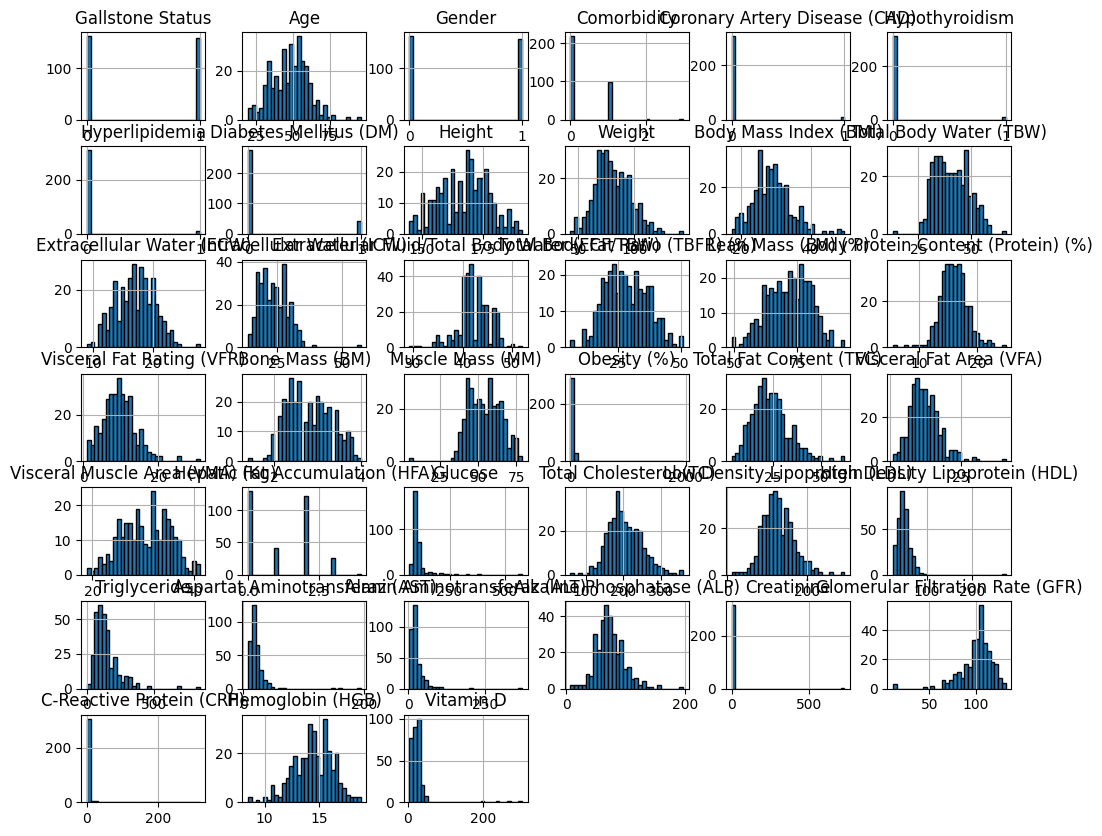

In [156]:
# Histograma para visualizar a distribuição das variáveis
df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.show()

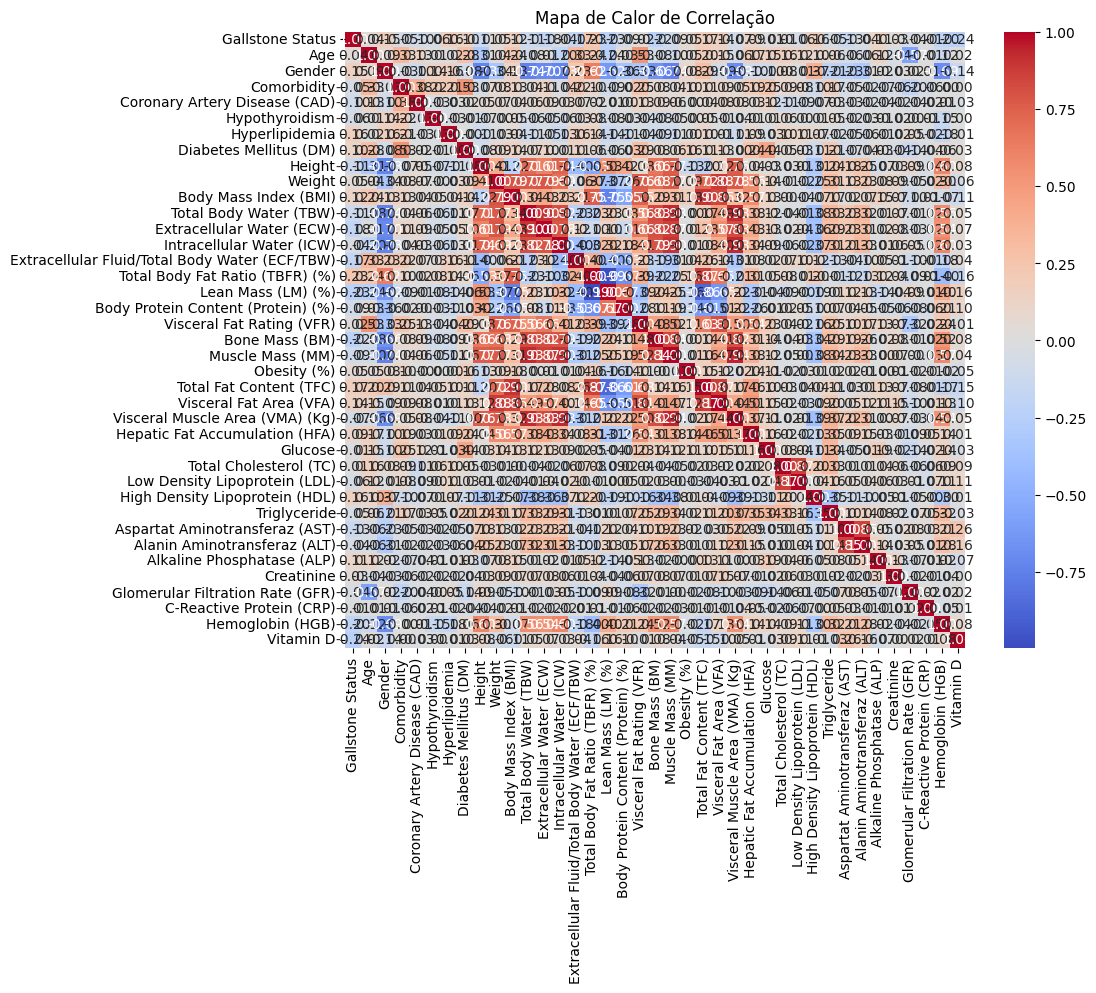

In [157]:
# Mapa de calor das variaveis numericas
plt.figure(figsize=(10, 8))
# Selecionar apenas colunas numéricas para a correlação
corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlação')
plt.show()

In [158]:
# Analisando os outliers.
# Crie a cópia com as colunas selecionadas
df_numerico = df[variaveis_numericas].copy()

# Definir o limite de outliers com base no IQR (Intervalo Interquartil)
Q1 = df_numerico.quantile(0.25)
Q3 = df_numerico.quantile(0.75)
IQR = Q3 - Q1

# Definir limites inferior e superior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar quantos valores estão fora desses limites
outliers = ((df_numerico < limite_inferior) | (df_numerico > limite_superior)).sum()

# Filtra a série 'outliers' para mostrar apenas contagens maiores que 0
outliers_filtrados = outliers[outliers > 0]

# Exibe o resultado
print(outliers_filtrados)

Age                                                2
Weight                                             2
Body Mass Index (BMI)                              5
Total Body Water (TBW)                             2
Extracellular Water (ECW)                          1
Intracellular Water (ICW)                          1
Extracellular Fluid/Total Body Water (ECF/TBW)     7
Body Protein Content (Protein) (%)                 8
Visceral Fat Rating (VFR)                          3
Muscle Mass (MM)                                   1
Obesity (%)                                        7
Total Fat Content (TFC)                            7
Visceral Fat Area (VFA)                            5
Glucose                                           25
Total Cholesterol (TC)                             5
Low Density Lipoprotein (LDL)                      4
High Density Lipoprotein (HDL)                     5
Triglyceride                                      20
Aspartat Aminotransferaz (AST)                

# Preparando Os Dados Para Analise

## Tratando Os Dados Ausentes

In [159]:
# Tratando os dados de 'Visceral Muscle Area (VMA) (Kg)'
mediana_de_VMA = df['Visceral Muscle Area (VMA) (Kg)'].median()
df['Visceral Muscle Area (VMA) (Kg)'].fillna(mediana_de_VMA, inplace=True)

C:\Users\NVME\AppData\Local\Temp\ipykernel_9740\295162258.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Visceral Muscle Area (VMA) (Kg)'].fillna(mediana_de_VMA, inplace=True)


In [160]:
# Tratando os dados de 'Glomerular Filtration Rate (GFR)'
mediana_de_GFR = df['Glomerular Filtration Rate (GFR)'].median()
df['Glomerular Filtration Rate (GFR)'].fillna(mediana_de_GFR, inplace=True)

C:\Users\NVME\AppData\Local\Temp\ipykernel_9740\3388742682.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Glomerular Filtration Rate (GFR)'].fillna(mediana_de_GFR, inplace=True)


In [161]:
# Tratando os dados de 'Vitamin D'
mediana_de_D = df['Vitamin D'].median()
df['Vitamin D'].fillna(mediana_de_D, inplace=True)

C:\Users\NVME\AppData\Local\Temp\ipykernel_9740\2962165668.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Vitamin D'].fillna(mediana_de_D, inplace=True)


## Tratando Os Outliers

In [162]:
# Aplicando MinMaxScaler de 0 até 1 para amenizar os outliers.
scaler = MinMaxScaler(feature_range=(0,1))
df[variaveis_numericas] = scaler.fit_transform(df[variaveis_numericas])

## Tratando As Variaveis Numericas

In [163]:
# Aplicando One-Hot Encoding nas colunas textuais
df = pd.get_dummies(
    data=df,
    columns=variaveis_textuais,
    drop_first=True  # Boa prática para evitar multicolinearidade em modelos
)

# Analise dos Melhores Atributos

## Coeficiente de Lasso

In [164]:
# Separar variáveis independentes (X) e dependente (y)
X = df.drop(columns=["Gallstone Status"])
Y = df["Gallstone Status"]

In [165]:
# Dividir em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [ ]:
# Modelo Lasso com Cross-Validation
lasso = LassoCV(cv=15, random_state=42)
lasso.fit(X_train, Y_train)

C:\Users\NVME\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.181e-03, tolerance: 5.096e-03
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\NVME\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.084e-02, tolerance: 5.096e-03
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\NVME\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCac

,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


In [167]:
# Coeficientes do modelo Lasso
lasso_importance = np.abs(lasso.coef_)

In [168]:
# Criar DataFrame com os resultados
lasso_feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": lasso_importance
}).sort_values(by="Importance", ascending=False)

,Feature,Importance
7,Extracellular Fluid/Total Body Water (ECF/TBW),0.900058
12,Bone Mass (BM),0.873256
30,Vitamin D,0.767197
9,Lean Mass (LM) (%),0.740844
23,Aspartat Aminotransferaz (AST),0.662149
37,Hyperlipidemia_1,0.397771
31,Gender_1,0.280841
29,Hemoglobin (HGB),0.243705
39,Hepatic Fat Accumulation (HFA)_1,0.205673
21,High Density Lipoprotein (HDL),0.197690


C:\Users\NVME\AppData\Local\Temp\ipykernel_9740\1789681967.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lasso_feature_importance["Feature"], y=lasso_feature_importance["Importance"], palette="magma")


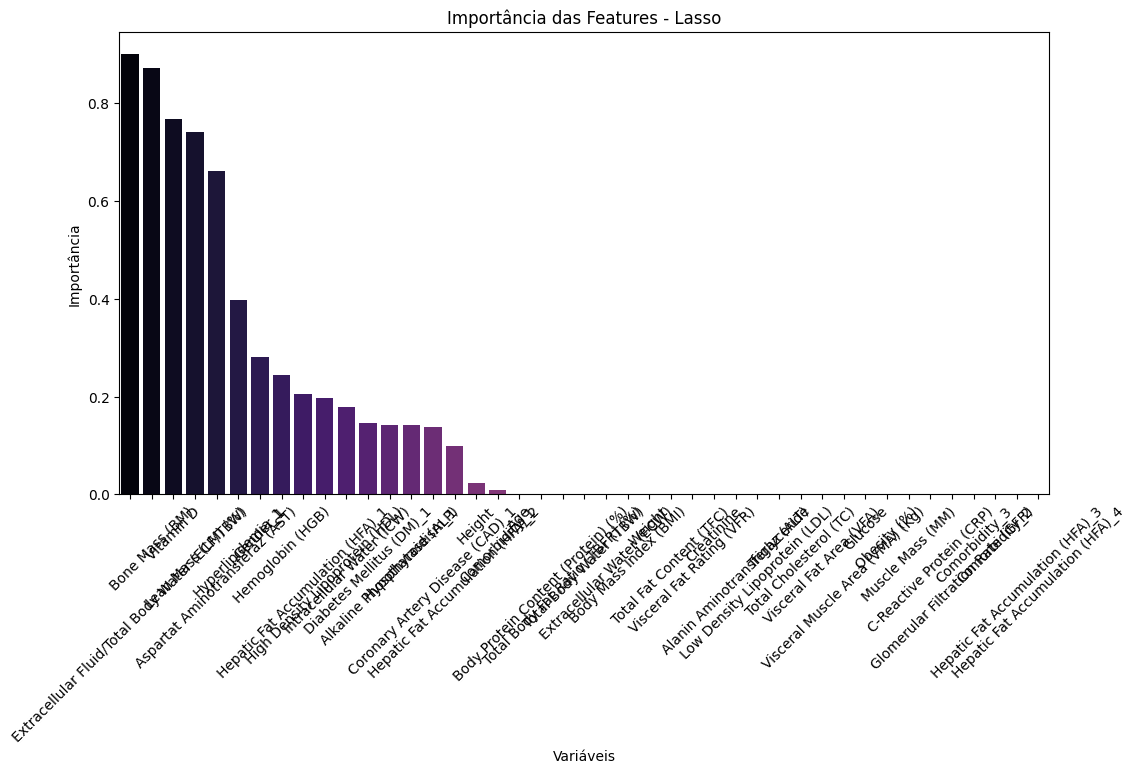

In [169]:
# Exibir a tabela
display(lasso_feature_importance)

# Plotar a importância das variáveis pelo Lasso
plt.figure(figsize=(12, 6))
sns.barplot(x=lasso_feature_importance["Feature"], y=lasso_feature_importance["Importance"], palette="magma")
plt.xticks(rotation=45)
plt.title("Importância das Features - Lasso")
plt.xlabel("Variáveis")
plt.ylabel("Importância")
plt.show()

## Random Forest Para Achar Os melhores Atributos

In [170]:
# Modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [171]:
# Importância das features no Random Forest
rf_importance = rf.feature_importances_

In [172]:
# Criar DataFrame com os resultados
rf_feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_importance
}).sort_values(by="Importance", ascending=False)

,Feature,Importance
28,C-Reactive Protein (CRP),0.134118
30,Vitamin D,0.088914
7,Extracellular Fluid/Total Body Water (ECF/TBW),0.049663
17,Visceral Muscle Area (VMA) (Kg),0.044660
23,Aspartat Aminotransferaz (AST),0.039646
5,Extracellular Water (ECW),0.032848
3,Body Mass Index (BMI),0.028607
25,Alkaline Phosphatase (ALP),0.028547
12,Bone Mass (BM),0.027699
21,High Density Lipoprotein (HDL),0.027410


C:\Users\NVME\AppData\Local\Temp\ipykernel_9740\3332435527.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_feature_importance["Feature"], y=rf_feature_importance["Importance"], palette="viridis")


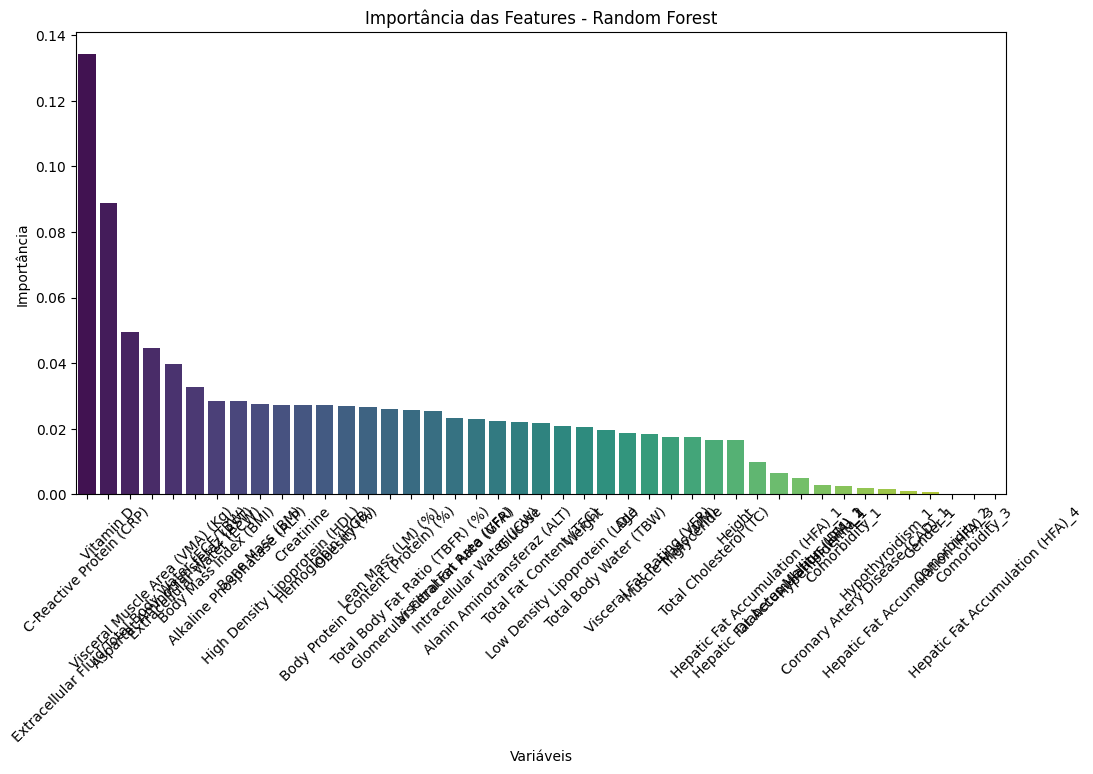

In [173]:
# Exibir a tabela
display(rf_feature_importance)

# Plotar a importância das variáveis pelo Random Forest
plt.figure(figsize=(12, 6))
sns.barplot(x=rf_feature_importance["Feature"], y=rf_feature_importance["Importance"], palette="viridis")
plt.xticks(rotation=45)
plt.title("Importância das Features - Random Forest")
plt.xlabel("Variáveis")
plt.ylabel("Importância")
plt.show()

## Unindo As Duas Tabelas Pela Média

In [174]:
# Unir (merge) os DataFrames usando o parâmetro 'suffixes'
merged_df = pd.merge(
    lasso_feature_importance, 
    rf_feature_importance, 
    on='Feature', 
    suffixes=('_Lasso', '_RF')
)

In [175]:
# Calcular a média e criar o novo DataFrame
merged_df['Average_Importance'] = (merged_df['Importance_Lasso'] + merged_df['Importance_RF']) / 2

In [176]:
# Criar o DataFrame final e ordenar
final_importance_df = merged_df[['Feature', 'Average_Importance']].sort_values(
    by='Average_Importance', 
    ascending=False
)

print("--- DataFrame Final com a Média das Importâncias ---")
print(final_importance_df)

--- DataFrame Final com a Média das Importâncias ---
                                           Feature  Average_Importance
0   Extracellular Fluid/Total Body Water (ECF/TBW)            0.474860
1                                   Bone Mass (BM)            0.450478
2                                        Vitamin D            0.428056
3                               Lean Mass (LM) (%)            0.383448
4                   Aspartat Aminotransferaz (AST)            0.350898
5                                 Hyperlipidemia_1            0.200388
6                                         Gender_1            0.140842
7                                 Hemoglobin (HGB)            0.135543
9                   High Density Lipoprotein (HDL)            0.112550
8                 Hepatic Fat Accumulation (HFA)_1            0.107741
10                       Intracellular Water (ICW)            0.101265
12                      Alkaline Phosphatase (ALP)            0.085685
11                      

## Filtrar A Tabela Só Pelas Mais Importantes

In [177]:
# Definir o limiar (threshold) de importância
limiar = 0.001

In [178]:
# Filtrar o DataFrame para manter apenas as features acima do limiar
features_selecionadas_df = lasso_feature_importance[lasso_feature_importance['Importance'] > limiar]

In [179]:
# Criar uma lista com os nomes das features selecionadas
lista_features_selecionadas = features_selecionadas_df["Feature"].tolist()

# Exibir a tabela APENAS com as features selecionadas
print(f"Total de features originais: {len(X.columns)}")
print(f"Features selecionadas pelo Lasso (importância > {limiar}): {len(lista_features_selecionadas)}")
print("\n--- Tabela de Features Selecionadas ---")
display(features_selecionadas_df)

Total de features originais: 43
Features selecionadas pelo Lasso (importância > 0.001): 18

--- Tabela de Features Selecionadas ---


,Feature,Importance
7,Extracellular Fluid/Total Body Water (ECF/TBW),0.900058
12,Bone Mass (BM),0.873256
30,Vitamin D,0.767197
9,Lean Mass (LM) (%),0.740844
23,Aspartat Aminotransferaz (AST),0.662149
37,Hyperlipidemia_1,0.397771
31,Gender_1,0.280841
29,Hemoglobin (HGB),0.243705
39,Hepatic Fat Accumulation (HFA)_1,0.205673
21,High Density Lipoprotein (HDL),0.197690


C:\Users\NVME\AppData\Local\Temp\ipykernel_9740\2887440835.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Feature", y='Importance', data=features_selecionadas_df, palette="magma")


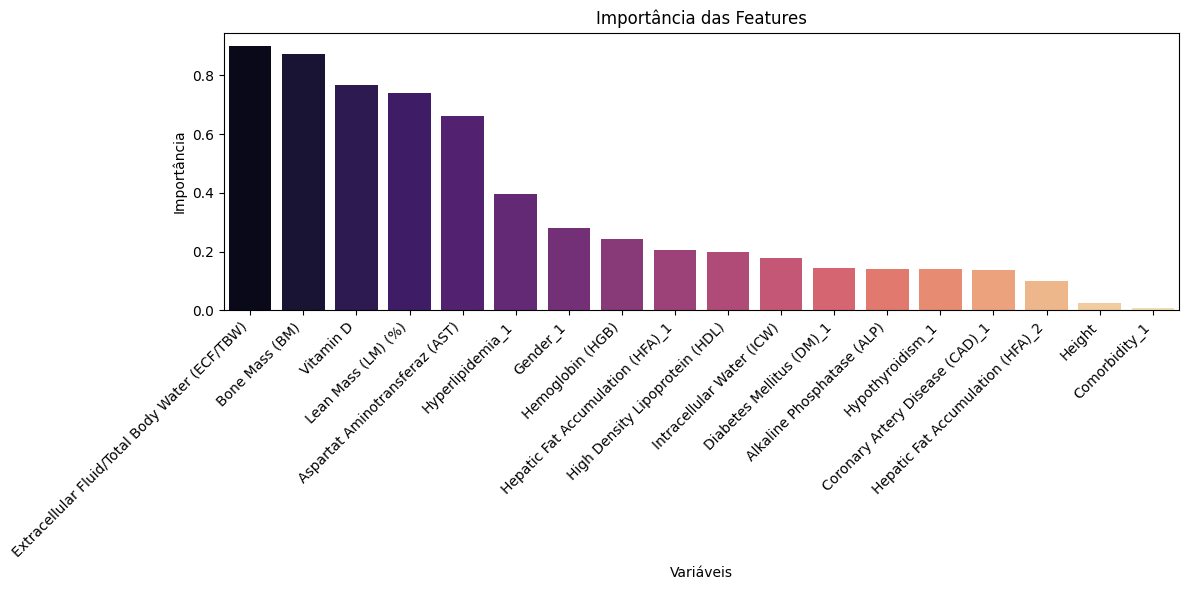

In [180]:
# Plotar a importância APENAS das features selecionadas
plt.figure(figsize=(12, 6))
sns.barplot(x="Feature", y='Importance', data=features_selecionadas_df, palette="magma")
plt.xticks(rotation=45, ha='right') # ha='right' alinha melhor os rótulos
plt.title("Importância das Features")
plt.xlabel("Variáveis")
plt.ylabel("Importância")
plt.tight_layout() # Ajusta o layout para não cortar os rótulos
plt.show()

## Reajuste de Treino e Teste

In [181]:
# Reajustando X para ter só as variáveis escolhidas anteriormente.
X = X[lista_features_selecionadas]

# Dividir em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Normalizar os dados para o Lasso
scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Machine Learning

## Machine Learning - Regressão Linear

In [182]:
# Definir os parâmetros para o GridSearchCV para Regressão Logística
parametros = {
    'C': [1, 10, 100], 
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# # Melhores parametros encontrados para acuracia
# parametros = {
#     'C': [10], 
#     'penalty': ['l1'],
#     'solver': ['liblinear']
# }

In [183]:
# Iniciar o modelo base
logreg = LogisticRegression(random_state=42, class_weight='balanced')

In [ ]:
# Configurar o GridSearchCV
grid_search = GridSearchCV(
    logreg,
    param_grid=parametros,
    cv=15, # cv=15 significa validação cruzada com 5 folds
    scoring='f1', # scoring='accuracy' indica que queremos otimizar a acurácia
    n_jobs=-1,  # Usar todos os núcleos disponíveis
    verbose=1  # Exibir progresso
)

In [185]:
# Treinar o GrindSsearchCV nos dados de treino
print("\nIniciando o GridSearchCV...")
grid_search.fit(X_train, Y_train)
print("GridSearchCV concluído!")


Iniciando o GridSearchCV...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
GridSearchCV concluído!


In [186]:
# Exibir os melhores hiperparâmetros e a melhor pontuação
print("\nMelhores hiperparâmetros encontrados:", grid_search.best_params_)
print(f"Melhor acurácia da validação cruzada:, {grid_search.best_score_:.4f}")

# Obter o melhor modelo treinado
best_LR_model = grid_search.best_estimator_


Melhores hiperparâmetros encontrados: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Melhor acurácia da validação cruzada:, 0.7894


In [187]:
# Avaliar o melhor modelo no conjunto de TESTE (o que realmente importa!)
y_pred_tuned = best_LR_model.predict(X_test)

print("\n--- Avaliação do Melhor Modelo (Otimizado) no Conjunto de TESTE ---")
accuracy_tuned = accuracy_score(Y_test, y_pred_tuned)
print(f"Acurácia (otimizada): {accuracy_tuned:.4f}")
print("\nMatriz de Confusão (otimizada):")
print(confusion_matrix(Y_test, y_pred_tuned))
print("\nRelatório de Classificação (otimizado):")
print(classification_report(Y_test, y_pred_tuned))


--- Avaliação do Melhor Modelo (Otimizado) no Conjunto de TESTE ---
Acurácia (otimizada): 0.7500

Matriz de Confusão (otimizada):
[[28  5]
 [11 20]]

Relatório de Classificação (otimizado):
              precision    recall  f1-score   support

           0       0.72      0.85      0.78        33
           1       0.80      0.65      0.71        31

    accuracy                           0.75        64
   macro avg       0.76      0.75      0.75        64
weighted avg       0.76      0.75      0.75        64



## Machine Learning - Floresta Aleatoria (Random Forest)

In [188]:
# Definir os parâmetros para o GridSearchCV para Random Forest
parametros_grid_rf = {
   'n_estimators': [50, 100, 150, 200, 250],  # Número de árvores na floresta'
   'criterion': ['gini', 'entropy', 'log_loss'],  # Critério de divisão
   'max_depth': [None, 5, 10, 15, 20],  # Profundidade máxima das árvores
   'min_samples_split': [2, 5, 10],  # Número mínimo de amostras necessárias para dividir um nó
   'min_samples_leaf': [1, 2, 4],  # Número mínimo de amostras necessárias em um nó folha
   'max_features': ['auto', 'sqrt', 'log2'],  # Número de recursos a serem considerados ao procurar a melhor divisão
   'random_state': [42]  # Para reprodutibilidade
}

# # O melhor conjunto de parâmetros para o GridSearchCV para Random Forest para acuracia
# parametros_grid_rf = {
#    'n_estimators': [50],  # Número de árvores na floresta'
#    'criterion': ['gini'],  # Critério de divisão
#    'max_depth': [5],  # Profundidade máxima das árvores
#    'min_samples_split': [10],  # Número mínimo de amostras necessárias para dividir um nó
#    'min_samples_leaf': [4],  # Número mínimo de amostras necessárias em um nó folha
#    'max_features': ['sqrt'],  # Número de recursos a serem considerados ao procurar a melhor divisão
#    'random_state': [42]  # Para reprodutibilidade
# }

In [189]:
# Inicializar o modelo base Random Forest
rf_base = RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
# Configurar o GridSearchCV para Random Forest
grid_search_rf = GridSearchCV(
    rf_base,
    param_grid=parametros_grid_rf,
    cv=15, # Validação cruzada com 5 folds
    scoring='f1', # Otimizar a acurácia
    n_jobs=-1,  # Usar todos os núcleos disponíveis
    verbose=1  # Exibir progresso
)

In [191]:
# Treinar o GridSearchCV nos dados de treino
print("\nIniciando o GridSearchCV para Random Forest...")
grid_search_rf.fit(X_train, Y_train)
print("GridSearchCV para Random Forest concluído!")


Iniciando o GridSearchCV para Random Forest...
Fitting 5 folds for each of 2025 candidates, totalling 10125 fits


C:\Users\NVME\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
3375 fits failed out of a total of 10125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2243 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\NVME\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\NVME\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-

GridSearchCV para Random Forest concluído!


In [192]:
# Exibir os melhores hiperparâmetros e a melhor pontuação de validação cruzada
print("\nMelhores hiperparâmetros encontrados para Random Forest:", grid_search_rf.best_params_)
print(f"Melhor acurácia da validação cruzada para Random Forest: {grid_search_rf.best_score_:.4f}")


Melhores hiperparâmetros encontrados para Random Forest: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 42}
Melhor acurácia da validação cruzada para Random Forest: 0.7942


In [193]:
# Obter o melhor modelo treinado
best_rf_model = grid_search_rf.best_estimator_

In [194]:
# Avaliar o melhor modelo Random Forest no conjunto de TESTE
y_pred_rf_tuned = best_rf_model.predict(X_test)

print("\n--- Avaliação do Melhor Modelo Random Forest (Otimizado) no Conjunto de TESTE ---")
accuracy_rf_tuned = accuracy_score(Y_test, y_pred_rf_tuned)
print(f"Acurácia (Random Forest otimizado): {accuracy_rf_tuned:.4f}")
print("\nMatriz de Confusão (Random Forest otimizado):")
print(confusion_matrix(Y_test, y_pred_rf_tuned))
print("\nRelatório de Classificação (Random Forest otimizado):")
print(classification_report(Y_test, y_pred_rf_tuned))


--- Avaliação do Melhor Modelo Random Forest (Otimizado) no Conjunto de TESTE ---
Acurácia (Random Forest otimizado): 0.7031

Matriz de Confusão (Random Forest otimizado):
[[26  7]
 [12 19]]

Relatório de Classificação (Random Forest otimizado):
              precision    recall  f1-score   support

           0       0.68      0.79      0.73        33
           1       0.73      0.61      0.67        31

    accuracy                           0.70        64
   macro avg       0.71      0.70      0.70        64
weighted avg       0.71      0.70      0.70        64



In [195]:
# # Plotar uma Árvore de Decisão do Random Forest
# feature_names = X.columns.tolist()

# plt.figure(figsize=(25, 15)) # Ajuste o tamanho para melhor visualização
# plot_tree(best_rf_model.estimators_[0], # Seleciona a primeira árvore da floresta (índice 0)
#           feature_names=feature_names, # Nome das features
#           class_names=['0', '1'], # Nomes das classes
#           filled=True, # Preencher os nós com cores
#           rounded=True, # Cantos arredondados
#           fontsize=10) # Tamanho da fonte
# plt.title("Visualização de Uma Árvore de Decisão do Random Forest Otimizado", fontsize=18)
# plt.show()

# print("\nPrimeiras 5 linhas de X_train (para referência das colunas):")
# print(X_train.head())

In [196]:
# X_train_pd_DF = pd.DataFrame(X_train)
# X_test_pd_DF = pd.DataFrame(X_test)

# # --- 3. CÁLCULO SHAP (MODO MODERNO) ---
# print("\n3. Calculando os valores SHAP (modo moderno)...")

# # A inicialização do KernelExplainer continua igual.
# # Usamos o DataFrame X_train diretamente para o kmeans.
# explainer = shap.KernelExplainer(best_rf_model.predict_proba, shap.kmeans(X_train_pd_DF, 100), link="logit")

# # ======================================================================
# # 🔴 A MÁGICA ACONTECE AQUI: A FORMA MAIS FÁCIL
# # Em vez de .shap_values(), chamamos o próprio explainer.
# # Isso retorna um objeto Explanation com tudo dentro.
# # ======================================================================
# shap_explanation = explainer(X_test_pd_DF)

# print("   - Cálculo SHAP concluído.")


# # --- 4. PLOTAGEM (MODO MODERNO E FÁCIL) ---
# print("\n4. Gerando os gráficos (modo moderno)...")

# # O dataset do vinho tem 3 classes (0, 1, 2). Vamos focar na classe 1.

# # --- Gráfico de Resumo (Summary Plot) ---
# print("   - Gerando o Summary Plot para a classe 1...")
# # A sintaxe [:,:,1] seleciona (todas as amostras, todas as features, para a classe de índice 1)
# shap.summary_plot(shap_explanation[:,:,1], X_test)
# plt.show()


# # --- Gráfico de Barras ---
# print("   - Gerando o Gráfico de Barras para a classe 1...")
# shap.plots.bar(shap_explanation[:,:,1]) # A função bar é mais direta para isso
# plt.show()


# # --- Gráfico Waterfall (para a primeira amostra) ---
# print("   - Gerando o Gráfico Waterfall para a primeira amostra (classe 1)...")
# # A sintaxe [0,:,1] seleciona (amostra 0, todas as features, para a classe 1)
# # Note como não precisamos mais montar o objeto "explicacao_amostra" manualmente!
# shap.plots.waterfall(shap_explanation[0,:,1])
# plt.show()

# print("\nProcesso concluído com sucesso!")

In [197]:
# X_train_pd_DF = pd.DataFrame(X_train)
# X_test_pd_DF = pd.DataFrame(X_test)


# # 1. Crie o explainer
# explainer = shap.KernelExplainer(best_rf_model.predict_proba, shap.kmeans(X_train_pd_DF, 100), link="logit")

# # 2. Crie o objeto Explanation a partir do seu DataFrame X_test
# shap_explanation = explainer(X_test_pd_DF)

# # 3. Plote usando o objeto Explanation e o DataFrame X_test
# # SHAP irá extrair os nomes das colunas de X_test automaticamente
# shap.summary_plot(shap_explanation[:,:,1], X_test_pd_DF) 
# plt.show()

In [198]:
# import pandas as pd
# import shap
# import matplotlib.pyplot as plt

# # Supondo que 'X_train' e 'X_test' são arrays NumPy e 'best_rf_model' está treinado

# # Crie os DataFrames como antes
# X_train_pd_DF = pd.DataFrame(X_train)
# X_test_pd_DF = pd.DataFrame(X_test)

# # ======================================================================
# # 🔴 A SOLUÇÃO ESTÁ AQUI: Converta os nomes das colunas para string
# # ======================================================================
# X_train_pd_DF.columns = X_train_pd_DF.columns.astype(str)
# X_test_pd_DF.columns = X_test_pd_DF.columns.astype(str)


# import pandas as pd
# import shap
# import matplotlib.pyplot as plt

# # Supondo que 'shap_explanation' e 'X_test_pd_DF' já foram criados.

# # --- NOVO PASSO: PREPARAÇÃO PARA PLOTAR TUDO ---
# # 1. Descobrir o número total de features para exibir
# total_de_features = X_test_pd_DF.shape[1]
# print(f"O seu dataset tem um total de {total_de_features} features. Mostrando todas no gráfico.")

# # 1. Crie o explainer (agora com os nomes das colunas corretos)
# explainer = shap.KernelExplainer(best_rf_model.predict_proba, shap.kmeans(X_train_pd_DF, 100), link="logit")

# # 2. Crie o objeto Explanation a partir do seu DataFrame X_test
# shap_explanation = explainer(X_test_pd_DF)

# # 3. Plote o gráfico de barras (agora vai funcionar)
# print("Gerando o Gráfico de Barras (Importância Média das Features)...")
# shap.plots.bar(shap_explanation[:,:,1], max_display=total_de_features)
# plt.show()

## Machine Learning - XGBoost

In [199]:
# Definir a grade de hiperparâmetros para XGBoost
param_grid_xgb = {
   'n_estimators': [100, 200, 300], # Número de árvores
   'learning_rate': [0.01, 0.05, 0.1], # Taxa de aprendizado
   'max_depth': [3, 5, 7], # Profundidade máxima de cada árvore
   'subsample': [0.7, 0.9], # Pode adicionar mais aqui se quiser explorar
   'colsample_bytree': [0.7, 0.9], # Pode adicionar mais aqui
   'gamma': [0, 0.1, 0.2], # Regularização
   'random_state': [42], # Para reprodutibilidade
}

# # Melhores parametros achado para acuracia
# param_grid_xgb = {
#    'n_estimators': [300], # Número de árvores
#    'learning_rate': [0.1], # Taxa de aprendizado
#    'max_depth': [3], # Profundidade máxima de cada árvore
#    'subsample': [0.7], # Pode adicionar mais aqui se quiser explorar
#    'colsample_bytree': [0.7], # Pode adicionar mais aqui
#    'gamma': [0], # Regularização
#    'random_state': [42], # Para reprodutibilidade
# }

In [200]:
# Inicializar o modelo base XGBoost
xgb_base = xgb.XGBClassifier(use_label_encoder=False, # Para evitar warnings recentes do XGBoost, 
                             eval_metric='logloss', # Definindo a métrica de avaliação
                             )

In [ ]:
# Configurar o GridSearchCV para XGBoost
grid_search_xgb = GridSearchCV(estimator=xgb_base, 
                               param_grid=param_grid_xgb,
                               cv=15, # Validação cruzada com 5 folds
                               scoring='f1', # Métrica de avaliação
                               n_jobs=-1, # Usar todos os núcleos disponíveis
                               verbose=1 # Exibir progresso
                               )

In [202]:
# Treinar o GridSearchCV nos dados de TREINO
print("\nIniciando a busca em grade para otimização de hiperparâmetros do XGBoost...")
grid_search_xgb.fit(X_train, Y_train)
print("Busca em grade concluída!")


Iniciando a busca em grade para otimização de hiperparâmetros do XGBoost...
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\NVME\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:183: UserWarning: [15:59:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Busca em grade concluída!


In [203]:
# Exibir os melhores hiperparâmetros e a melhor pontuação de validação cruzada
print("\nMelhores hiperparâmetros encontrados para XGBoost:", grid_search_xgb.best_params_)
print(f"Melhor acurácia da validação cruzada para XGBoost: {grid_search_xgb.best_score_:.4f}")


Melhores hiperparâmetros encontrados para XGBoost: {'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'random_state': 42, 'subsample': 0.7}
Melhor acurácia da validação cruzada para XGBoost: 0.7924


In [204]:
# Obter o melhor modelo treinado
best_xgb_model = grid_search_xgb.best_estimator_

In [205]:
# Avaliar o melhor modelo XGBoost no conjunto de TESTE
y_pred_xgb_tuned = best_xgb_model.predict(X_test)

print("\n--- Avaliação do Melhor Modelo XGBoost (Otimizado) no Conjunto de TESTE ---")
accuracy_xgb_tuned = accuracy_score(Y_test, y_pred_xgb_tuned)
print(f"Acurácia (XGBoost otimizado): {accuracy_xgb_tuned:.4f}")
print("\nMatriz de Confusão (XGBoost otimizado):")
print(confusion_matrix(Y_test, y_pred_xgb_tuned))
print("\nRelatório de Classificação (XGBoost otimizado):")
print(classification_report(Y_test, y_pred_xgb_tuned))


--- Avaliação do Melhor Modelo XGBoost (Otimizado) no Conjunto de TESTE ---
Acurácia (XGBoost otimizado): 0.6719

Matriz de Confusão (XGBoost otimizado):
[[26  7]
 [14 17]]

Relatório de Classificação (XGBoost otimizado):
              precision    recall  f1-score   support

           0       0.65      0.79      0.71        33
           1       0.71      0.55      0.62        31

    accuracy                           0.67        64
   macro avg       0.68      0.67      0.67        64
weighted avg       0.68      0.67      0.67        64



## Machine Learning - K-nn

In [206]:
# Definir a grade de hiperparâmetros para K-nn
param_grid_knn = {
   'n_neighbors': [7, 9, 11, 13, 15, 17, 19, 20, 21, 23, 25], # Valores comuns para K
   'weights': ['uniform', 'distance'], # Uniform: todos vizinhos contam igual; Distance: vizinhos mais próximos contam mais
   'metric': ['euclidean', 'manhattan'] # Funções de distância
}

# # Melhor conjunto de parâmetros para o GridSearchCV para K-nn para acuracia
# param_grid_knn = {
#    'n_neighbors': [25], # Valores comuns para K
#    'weights': ['distance'], # Uniform: todos vizinhos contam igual; Distance: vizinhos mais próximos contam mais
#    'metric': ['euclidean'] # Funções de distância
# }

In [207]:
# Inicializar o modelo base KNN
knn_base = KNeighborsClassifier()

In [ ]:
# Configurar o GridSearchCV para KNN
grid_search_knn = GridSearchCV(estimator=knn_base, 
                               param_grid=param_grid_knn,
                               cv=15, # Validação cruzada com 5 folds
                               scoring='f1', # Métrica de avaliação
                               n_jobs=-1, # Usar todos os núcleos disponíveis
                               verbose=1 # Exibir progresso
                               )

In [209]:
# Treinar o GridSearchCV nos dados de TREINO
print("\nIniciando a busca em grade para otimização de hiperparâmetros do KNN...")
grid_search_knn.fit(X_train, Y_train)
print("Busca em grade concluída!")


Iniciando a busca em grade para otimização de hiperparâmetros do KNN...
Fitting 5 folds for each of 44 candidates, totalling 220 fits
Busca em grade concluída!


In [210]:
# Exibir os melhores hiperparâmetros e a melhor pontuação de validação cruzada
print("\nMelhores hiperparâmetros encontrados para KNN:", grid_search_knn.best_params_)
print(f"Melhor acurácia da validação cruzada para KNN: {grid_search_knn.best_score_:.4f}")


Melhores hiperparâmetros encontrados para KNN: {'metric': 'manhattan', 'n_neighbors': 25, 'weights': 'distance'}
Melhor acurácia da validação cruzada para KNN: 0.7033


In [211]:
# Obter o melhor modelo treinado
best_knn_model = grid_search_knn.best_estimator_

In [212]:
# Avaliar o melhor modelo KNN no conjunto de TESTE
y_pred_knn_tuned = best_knn_model.predict(X_test)

print("\n--- Avaliação do Melhor Modelo KNN (Otimizado) no Conjunto de TESTE ---")
accuracy_knn_tuned = accuracy_score(Y_test, y_pred_knn_tuned)
print(f"Acurácia (KNN otimizado): {accuracy_knn_tuned:.4f}")
print("\nMatriz de Confusão (KNN otimizado):")
print(confusion_matrix(Y_test, y_pred_knn_tuned))
print("\nRelatório de Classificação (KNN otimizado):")
print(classification_report(Y_test, y_pred_knn_tuned))


--- Avaliação do Melhor Modelo KNN (Otimizado) no Conjunto de TESTE ---
Acurácia (KNN otimizado): 0.6406

Matriz de Confusão (KNN otimizado):
[[22 11]
 [12 19]]

Relatório de Classificação (KNN otimizado):
              precision    recall  f1-score   support

           0       0.65      0.67      0.66        33
           1       0.63      0.61      0.62        31

    accuracy                           0.64        64
   macro avg       0.64      0.64      0.64        64
weighted avg       0.64      0.64      0.64        64



## Machine Learning - SVM 

In [213]:
# Definir a grade de hiperparâmetros para SVM
param_grid_svm = {
   'C': [0.1, 1, 10, 100], # Parâmetro de regularização (menor C = mais regularização)
   'gamma': [0.001, 0.01, 0.1, 1], # Parâmetro do kernel (impacta a forma da fronteira de decisão)
   'kernel': ['rbf'] # O kernel RBF é um bom ponto de partida, mas você pode testar outros como 'linear', 'poly'
}

# # Melhores parametros pra acuracia
# param_grid_svm = {
#    'C': [100], # Parâmetro de regularização (menor C = mais regularização)
#    'gamma': [0.1], # Parâmetro do kernel (impacta a forma da fronteira de decisão)
#    'kernel': ['rbf'] # O kernel RBF é um bom ponto de partida, mas você pode testar outros como 'linear', 'poly'
# }

In [214]:
# Inicializar o modelo base SVM
svm_base = SVC(random_state=42,
              probability=True, # Habilitar a previsão de probabilidades
              class_weight='balanced'
              )

In [ ]:
# Configurar o GridSearchCV para SVM
grid_search_svm = GridSearchCV(estimator=svm_base, 
                               param_grid=param_grid_svm,
                               cv=15, # Validação cruzada com 5 folds
                               scoring='f1', # Otimizar pela acurácia
                               n_jobs=-1, # Usar todos os núcleos disponíveis
                               verbose=1) # verbose=1 para ver o progresso

In [216]:
# Treinar o GridSearchCV nos dados de TREINO
print("\nIniciando a busca em grade para otimização de hiperparâmetros do SVM...")
grid_search_svm.fit(X_train, Y_train)
print("Busca em grade concluída!")


Iniciando a busca em grade para otimização de hiperparâmetros do SVM...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Busca em grade concluída!


In [217]:
# Exibir os melhores hiperparâmetros e a melhor pontuação de validação cruzada
print("\nMelhores hiperparâmetros encontrados para SVM:", grid_search_svm.best_params_)
print(f"Melhor acurácia da validação cruzada para SVM: {grid_search_svm.best_score_:.4f}")


Melhores hiperparâmetros encontrados para SVM: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Melhor acurácia da validação cruzada para SVM: 0.7432


In [218]:
# Obter o melhor modelo treinado
best_svm_model = grid_search_svm.best_estimator_

In [219]:
# Avaliar o melhor modelo SVM no conjunto de TESTE
y_pred_svm_tuned = best_svm_model.predict(X_test)

print("\n--- Avaliação do Melhor Modelo SVM (Otimizado) no Conjunto de TESTE ---")
accuracy_svm_tuned = accuracy_score(Y_test, y_pred_svm_tuned)
print(f"Acurácia (SVM otimizado): {accuracy_svm_tuned:.4f}")
print("\nMatriz de Confusão (SVM otimizado):")
print(confusion_matrix(Y_test, y_pred_svm_tuned))
print("\nRelatório de Classificação (SVM otimizado):")
print(classification_report(Y_test, y_pred_svm_tuned))


--- Avaliação do Melhor Modelo SVM (Otimizado) no Conjunto de TESTE ---
Acurácia (SVM otimizado): 0.7031

Matriz de Confusão (SVM otimizado):
[[28  5]
 [14 17]]

Relatório de Classificação (SVM otimizado):
              precision    recall  f1-score   support

           0       0.67      0.85      0.75        33
           1       0.77      0.55      0.64        31

    accuracy                           0.70        64
   macro avg       0.72      0.70      0.69        64
weighted avg       0.72      0.70      0.70        64



## Machine Learning - MLP

In [220]:
# Definir os parâmetros para o GridSearchCV para MLP
parametros_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)], # Arquiteturas da rede
    'activation': ['tanh', 'relu'], # Função de ativação
    'solver': ['sgd', 'adam'], # Algoritmo de otimização
    'alpha': [0.0001, 0.001, 0.05], # Parâmetro de regularização L2
    'learning_rate': ['constant', 'adaptive'], # Estratégia da taxa de aprendizado
    'max_iter': [200, 300], # Número máximo de iterações
    'random_state': [42] # Para reprodutibilidade
}

# # Melhores parâremetros encontrados para MLP
# parametros_grid_mlp = {
#     'hidden_layer_sizes': [(100, 50)], # Arquiteturas da rede
#     'activation': ['tanh'], # Função de ativação
#     'solver': ['adam'], # Algoritmo de otimização
#     'alpha': [0.001], # Parâmetro de regularização L2
#     'learning_rate': ['constant'], # Estratégia da taxa de aprendizado
#     'max_iter': [300], # Número máximo de iterações
#     'random_state': [42] # Para reprodutibilidade
# }

In [221]:
# Inicializar o modelo base MLPClassifier
mlp_base = MLPClassifier(random_state=42)


In [ ]:
# Configurar o GridSearchCV para MLP
grid_search_mlp = GridSearchCV(
    mlp_base,
    param_grid=parametros_grid_mlp,
    cv=15, # Validação cruzada com 5 folds
    scoring='f1', # Otimizar a acurácia
    n_jobs=-1, # Usar todos os núcleos disponíveis
    verbose=1 # Exibir progresso
)

In [223]:
# Treinar o GridSearchCV nos dados de treino
print("\nIniciando o GridSearchCV para MLP...")
grid_search_mlp.fit(X_train, Y_train)
print("GridSearchCV para MLP concluído!")


Iniciando o GridSearchCV para MLP...
Fitting 5 folds for each of 192 candidates, totalling 960 fits
GridSearchCV para MLP concluído!


C:\Users\NVME\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [224]:
# Exibir os melhores hiperparâmetros e a melhor pontuação de validação cruzada
print("\nMelhores hiperparâmetros encontrados para MLP:", grid_search_mlp.best_params_)
print(f"Melhor acurácia da validação cruzada para MLP: {grid_search_mlp.best_score_:.4f}")


Melhores hiperparâmetros encontrados para MLP: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'max_iter': 200, 'random_state': 42, 'solver': 'adam'}
Melhor acurácia da validação cruzada para MLP: 0.7556


In [225]:
# Obter o melhor modelo treinado
best_mlp_model = grid_search_mlp.best_estimator_

In [226]:
# Avaliar o melhor modelo MLP no conjunto de TESTE
y_pred_mlp_tuned = best_mlp_model.predict(X_test)

print("\n--- Avaliação do Melhor Modelo MLP (Otimizado) no Conjunto de TESTE ---")
accuracy_mlp_tuned = accuracy_score(Y_test, y_pred_mlp_tuned)
print(f"Acurácia (MLP otimizado): {accuracy_mlp_tuned:.4f}")

print("\nMatriz de Confusão (MLP otimizado):")
print(confusion_matrix(Y_test, y_pred_mlp_tuned))

print("\nRelatório de Classificação (MLP otimizado):")
print(classification_report(Y_test, y_pred_mlp_tuned))


--- Avaliação do Melhor Modelo MLP (Otimizado) no Conjunto de TESTE ---
Acurácia (MLP otimizado): 0.7188

Matriz de Confusão (MLP otimizado):
[[26  7]
 [11 20]]

Relatório de Classificação (MLP otimizado):
              precision    recall  f1-score   support

           0       0.70      0.79      0.74        33
           1       0.74      0.65      0.69        31

    accuracy                           0.72        64
   macro avg       0.72      0.72      0.72        64
weighted avg       0.72      0.72      0.72        64



## Machine Learning - RidgeClassifier

In [227]:
# Definir os parâmetros para o GridSearchCV para Ridge Classifier
parametros_grid_ridge = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0], # Força da regularização
    'solver': ['svd', 'cholesky', 'lsqr', 'sag'], # Algoritmos de otimização
    'random_state': [42] # Para reprodutibilidade
}

# # Melhores parâmetros encontrados
# parametros_grid_ridge = {
#     'alpha': [0.1], # Força da regularização
#     'solver': ['svd'], # Algoritmos de otimização
#     'random_state': [42] # Para reprodutibilidade
# }

In [228]:
# Inicializar o modelo base RidgeClassifier
ridge_base = RidgeClassifier(class_weight='balanced', random_state=42)

In [ ]:
# Configurar o GridSearchCV para Ridge Classifier
grid_search_ridge = GridSearchCV(
    ridge_base,
    param_grid=parametros_grid_ridge,
    cv=15, # Validação cruzada com 5 folds
    scoring='f1', # Otimizar a acurácia
    n_jobs=-1, # Usar todos os núcleos disponíveis
    verbose=1 # Exibir progresso
)

In [230]:
# Treinar o GridSearchCV nos dados de treino (use os dados escalados se aplicável)
print("\nIniciando o GridSearchCV para Ridge Classifier...")
grid_search_ridge.fit(X_train, Y_train)
print("GridSearchCV para Ridge Classifier concluído!")


Iniciando o GridSearchCV para Ridge Classifier...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
GridSearchCV para Ridge Classifier concluído!


In [231]:
# Exibir os melhores hiperparâmetros e a melhor pontuação de validação cruzada
print("\nMelhores hiperparâmetros encontrados para Ridge Classifier:", grid_search_ridge.best_params_)
print(f"Melhor acurácia da validação cruzada para Ridge Classifier: {grid_search_ridge.best_score_:.4f}")


Melhores hiperparâmetros encontrados para Ridge Classifier: {'alpha': 0.01, 'random_state': 42, 'solver': 'svd'}
Melhor acurácia da validação cruzada para Ridge Classifier: 0.7543


In [232]:
# Obter o melhor modelo treinado
best_ridge_model = grid_search_ridge.best_estimator_

In [233]:
# Avaliar o melhor modelo Ridge Classifier no conjunto de TESTE
y_pred_ridge_tuned = best_ridge_model.predict(X_test)

print("\n--- Avaliação do Melhor Modelo Ridge Classifier (Otimizado) no Conjunto de TESTE ---")
accuracy_ridge_tuned = accuracy_score(Y_test, y_pred_ridge_tuned)
print(f"Acurácia (Ridge Classifier otimizado): {accuracy_ridge_tuned:.4f}")

print("\nMatriz de Confusão (Ridge Classifier otimizado):")
print(confusion_matrix(Y_test, y_pred_ridge_tuned))

print("\nRelatório de Classificação (Ridge Classifier otimizado):")
print(classification_report(Y_test, y_pred_ridge_tuned))


--- Avaliação do Melhor Modelo Ridge Classifier (Otimizado) no Conjunto de TESTE ---
Acurácia (Ridge Classifier otimizado): 0.7188

Matriz de Confusão (Ridge Classifier otimizado):
[[30  3]
 [15 16]]

Relatório de Classificação (Ridge Classifier otimizado):
              precision    recall  f1-score   support

           0       0.67      0.91      0.77        33
           1       0.84      0.52      0.64        31

    accuracy                           0.72        64
   macro avg       0.75      0.71      0.70        64
weighted avg       0.75      0.72      0.71        64



## Machine Learning - Naive Bayes

In [ ]:
# Importar as bibliotecas necessárias
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np # É comum usar o numpy para definir a faixa de busca

# Supondo que X_train, Y_train, X_test, Y_test já foram definidos.
# O Naive Bayes não exige normalização dos dados, mas pode se beneficiar dela
# em alguns casos, embora não seja um requisito estrito como no MLP ou SVM.

# Definir os parâmetros para o GridSearchCV para Gaussian Naive Bayes
# O principal hiperparâmetro é 'var_smoothing', que adiciona uma pequena
# porção da maior variância de todos os atributos à variância de cada um.
# Isso ajuda a estabilizar o modelo, especialmente se houver variâncias nulas.
parametros_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100) # Testa 100 valores entre 1e-0 e 1e-9
}

# Inicializar o modelo base GaussianNB
nb_base = GaussianNB()

# Configurar o GridSearchCV para Gaussian Naive Bayes
grid_search_nb = GridSearchCV(
    estimator=nb_base,
    param_grid=parametros_grid_nb,
    cv=15, # Validação cruzada com 5 folds
    scoring='f1', # Otimizar a acurácia
    n_jobs=-1, # Usar todos os núcleos disponíveis
    verbose=1 # Exibir progresso
)

# Treinar o GridSearchCV nos dados de treino
print("\nIniciando o GridSearchCV para Gaussian Naive Bayes...")
grid_search_nb.fit(X_train, Y_train)
print("GridSearchCV para Gaussian Naive Bayes concluído!")

# Exibir os melhores hiperparâmetros e a melhor pontuação de validação cruzada
print("\nMelhores hiperparâmetros encontrados para Gaussian Naive Bayes:", grid_search_nb.best_params_)
print(f"Melhor acurácia da validação cruzada para Gaussian Naive Bayes: {grid_search_nb.best_score_:.4f}")

# Obter o melhor modelo treinado
best_nb_model = grid_search_nb.best_estimator_

# Avaliar o melhor modelo Gaussian Naive Bayes no conjunto de TESTE
y_pred_nb_tuned = best_nb_model.predict(X_test)

print("\n--- Avaliação do Melhor Modelo Gaussian Naive Bayes (Otimizado) no Conjunto de TESTE ---")
accuracy_nb_tuned = accuracy_score(Y_test, y_pred_nb_tuned)
print(f"Acurácia (Gaussian Naive Bayes otimizado): {accuracy_nb_tuned:.4f}")

print("\nMatriz de Confusão (Gaussian Naive Bayes otimizado):")
print(confusion_matrix(Y_test, y_pred_nb_tuned))

print("\nRelatório de Classificação (Gaussian Naive Bayes otimizado):")
print(classification_report(Y_test, y_pred_nb_tuned))


Iniciando o GridSearchCV para Gaussian Naive Bayes...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GridSearchCV para Gaussian Naive Bayes concluído!

Melhores hiperparâmetros encontrados para Gaussian Naive Bayes: {'var_smoothing': np.float64(0.12328467394420659)}
Melhor acurácia da validação cruzada para Gaussian Naive Bayes: 0.6872

--- Avaliação do Melhor Modelo Gaussian Naive Bayes (Otimizado) no Conjunto de TESTE ---
Acurácia (Gaussian Naive Bayes otimizado): 0.6719

Matriz de Confusão (Gaussian Naive Bayes otimizado):
[[25  8]
 [13 18]]

Relatório de Classificação (Gaussian Naive Bayes otimizado):
              precision    recall  f1-score   support

           0       0.66      0.76      0.70        33
           1       0.69      0.58      0.63        31

    accuracy                           0.67        64
   macro avg       0.68      0.67      0.67        64
weighted avg       0.67      0.67      0.67        64



## Machine learning - Quadratic Discriminant Analysis

In [235]:
# Definir os parâmetros para o GridSearchCV para QDA.
parametros_grid_qda = {
    'reg_param': np.arange(0.1) # Testa valores de 0.0 a 1.0, com passo de 0.1
}

In [236]:
# Inicializar o modelo base QuadraticDiscriminantAnalysis
qda_base = QuadraticDiscriminantAnalysis()

In [ ]:
# Configurar o GridSearchCV para QDA
grid_search_qda = GridSearchCV(
    estimator=qda_base,
    param_grid=parametros_grid_qda,
    cv=15, # Validação cruzada com 5 folds
    scoring='f1', # Otimizar a acurácia
    n_jobs=-1, # Usar todos os núcleos disponíveis
    verbose=1 # Exibir progresso
)

In [238]:
# Treinar o GridSearchCV nos dados de treino
print("\nIniciando o GridSearchCV para Quadratic Discriminant Analysis (QDA)...")
grid_search_qda.fit(X_train, Y_train)
print("GridSearchCV para QDA concluído!")


Iniciando o GridSearchCV para Quadratic Discriminant Analysis (QDA)...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
GridSearchCV para QDA concluído!


C:\Users\NVME\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


In [239]:
# Exibir os melhores hiperparâmetros e a melhor pontuação de validação cruzada
print("\nMelhores hiperparâmetros encontrados para QDA:", grid_search_qda.best_params_)
print(f"Melhor acurácia da validação cruzada para QDA: {grid_search_qda.best_score_:.4f}")


Melhores hiperparâmetros encontrados para QDA: {'reg_param': np.float64(0.0)}
Melhor acurácia da validação cruzada para QDA: 0.4430


In [240]:
# Obter o melhor modelo treinado
best_qda_model = grid_search_qda.best_estimator_

In [241]:
# Avaliar o melhor modelo QDA no conjunto de TESTE
y_pred_qda_tuned = best_qda_model.predict(X_test)

print("\n--- Avaliação do Melhor Modelo QDA (Otimizado) no Conjunto de TESTE ---")
accuracy_qda_tuned = accuracy_score(Y_test, y_pred_qda_tuned)
print(f"Acurácia (QDA otimizado): {accuracy_qda_tuned:.4f}")

print("\nMatriz de Confusão (QDA otimizado):")
print(confusion_matrix(Y_test, y_pred_qda_tuned))

print("\nRelatório de Classificação (QDA otimizado):")
print(classification_report(Y_test, y_pred_qda_tuned))


--- Avaliação do Melhor Modelo QDA (Otimizado) no Conjunto de TESTE ---
Acurácia (QDA otimizado): 0.5781

Matriz de Confusão (QDA otimizado):
[[19 14]
 [13 18]]

Relatório de Classificação (QDA otimizado):
              precision    recall  f1-score   support

           0       0.59      0.58      0.58        33
           1       0.56      0.58      0.57        31

    accuracy                           0.58        64
   macro avg       0.58      0.58      0.58        64
weighted avg       0.58      0.58      0.58        64



# Classificador por Voto

In [242]:
# Crie a lista de tuplas com um nome e o objeto do seu modelo JÁ TREINADO
estimators = [
    ('random_forest', best_rf_model),
    ('xgboost', best_xgb_model),
    ('svm', best_svm_model),
    ('mlp', best_mlp_model)
]

In [243]:
# Crie os Voting Classifiers
voting_clf_hard = VotingClassifier(estimators=estimators, voting='hard')
voting_clf_soft = VotingClassifier(estimators=estimators, voting='soft')

In [244]:
# Ajuste o Voting Classifier
print("Ajustando o Voting Classifier...")
voting_clf_hard.fit(X_train, Y_train)
voting_clf_soft.fit(X_train, Y_train)
print("Ajuste concluído!")

Ajustando o Voting Classifier...


C:\Users\NVME\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:183: UserWarning: [16:02:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\NVME\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\NVME\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:183: UserWarning: [16:02:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(

Ajuste concluído!


C:\Users\NVME\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [245]:
# Agora você pode usá-lo para fazer previsões no conjunto de teste.
y_pred_hard = voting_clf_hard.predict(X_test)
y_pred_soft = voting_clf_soft.predict(X_test)

In [246]:
# Avalie a performance do ensemble
print("\n--- Avaliação do Ensemble com Hard Voting ---")
print(f"Acurácia: {accuracy_score(Y_test, y_pred_hard):.4f}")
print(classification_report(Y_test, y_pred_hard))

print("\n--- Avaliação do Ensemble com Soft Voting ---")
print(f"Acurácia: {accuracy_score(Y_test, y_pred_soft):.4f}")
print(classification_report(Y_test, y_pred_soft))


--- Avaliação do Ensemble com Hard Voting ---
Acurácia: 0.7188
              precision    recall  f1-score   support

           0       0.68      0.85      0.76        33
           1       0.78      0.58      0.67        31

    accuracy                           0.72        64
   macro avg       0.73      0.71      0.71        64
weighted avg       0.73      0.72      0.71        64


--- Avaliação do Ensemble com Soft Voting ---
Acurácia: 0.7500
              precision    recall  f1-score   support

           0       0.72      0.85      0.78        33
           1       0.80      0.65      0.71        31

    accuracy                           0.75        64
   macro avg       0.76      0.75      0.75        64
weighted avg       0.76      0.75      0.75        64



In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 1. Recrie seus melhores modelos, mas sem treiná-los.
#    Use os melhores parâmetros que você encontrou no GridSearchCV.
#    Exemplo:
rf_base = RandomForestClassifier(criterion= 'gini', max_depth= 5, max_features= 'log2', min_samples_leaf= 4, min_samples_split= 10, n_estimators= 50, random_state= 42)
svm_base = SVC(C=100, gamma=0.1, kernel='rbf')
mlp_base = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', random_state=42)


# 2. Crie a lista de estimadores base
base_estimators = [
    ('random_forest', rf_base),
    ('SVM', svm_base),
    ('mlp', mlp_base)
]

# 3. Escolha um meta-modelo. Regressão Logística é uma escolha comum e robusta.
meta_model = LogisticRegression()

# 4. Crie o Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=base_estimators,
    final_estimator=meta_model,
    cv=15
)

# 5. Treine o Stacking Classifier no conjunto de treino completo
print("Iniciando o treinamento do Stacking Classifier...")
stacking_clf.fit(X_train, Y_train)
print("Treinamento concluído!")

# 6. Faça previsões e avalie
y_pred_stacking = stacking_clf.predict(X_test)

print("\n--- Avaliação do Ensemble com Stacking ---")
print(f"Acurácia: {accuracy_score(Y_test, y_pred_stacking):.4f}")
print(classification_report(Y_test, y_pred_stacking))

Iniciando o treinamento do Stacking Classifier...


C:\Users\NVME\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\NVME\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Treinamento concluído!

--- Avaliação do Ensemble com Stacking ---
Acurácia: 0.7031
              precision    recall  f1-score   support

           0       0.68      0.82      0.74        33
           1       0.75      0.58      0.65        31

    accuracy                           0.70        64
   macro avg       0.71      0.70      0.70        64
weighted avg       0.71      0.70      0.70        64



C:\Users\NVME\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
